In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
raw_df = pd.read_csv('house_price.csv')

/usr/local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47,70,71,72,79) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
house_df = pd.read_csv('assets/updated_house_df.csv')
#house_df["deed_date"] = pd.to_datetime(house_df["deed_date"])
#house_df["year"] = house_df["deed_date"].dt.year

In [4]:
house_df.shape

(259024, 34)

In [5]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all'],
      dtype='object')

In [6]:
house_df.head()

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,bath_fixtures,physical_zip_code,physical_city,...,demand,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all
0,2000-05-01,0.0,17500.0,134923.0,1.0,1300,1.5,0,27603,raleigh,...,120.5,NaN,NaN,2000,2049,1,0,0,0,0
1,2000-06-01,0.0,144000.0,174591.0,1.0,1888,2.0,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
2,2000-05-01,0.0,259000.0,248271.0,2.0,2648,2.5,0,27607,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
3,2000-04-01,0.0,131000.0,174298.0,1.0,2148,2.0,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1
4,2000-05-01,0.0,110000.0,115151.0,1.0,1216,1.5,0,27604,raleigh,...,120.5,NaN,NaN,2000,2049,1,1,1,1,1


In [7]:
house_df[house_df['bath'] == 'J']

,deed_date,land_sale_price,total_sale_price,assessed_building_value,story_height,heated_area,bath,bath_fixtures,physical_zip_code,physical_city,...,demand,wake_supply_index,wake_demand_index,year,crime,electric,gas,water,sewer,all


In [8]:
house_df.shape

(259024, 34)

In [9]:
house_df.tail(3).T

,259021,259022,259023
deed_date,2021-12-01,2021-12-01,2021-05-01
land_sale_price,0.0,0.0,0.0
total_sale_price,430000.0,200300.0,170000.0
assessed_building_value,322050.0,65465.0,119201.0
story_height,2.0,1.0,1.0
heated_area,1479,2407,896
bath,2.5,2.0,1.0
bath_fixtures,0,3,0
physical_zip_code,27610,27601,27529
physical_city,raleigh,raleigh,garner


In [10]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all'],
      dtype='object')

In [11]:
house_df['is_covid'] = 0
house_df.loc[(house_df['covid_cases'] > 0), 'is_covid'] = 1
house_df['is_covid'].value_counts()

0    203238
1     55786
Name: is_covid, dtype: int64

## summary stats and distribution

### land_sale_price

<AxesSubplot:>

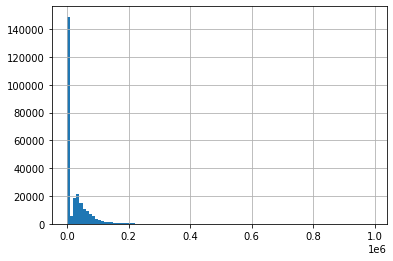

In [12]:
house_df.land_sale_price.hist(bins=np.arange(0,1e6,1e4))

In [13]:
house_df.land_sale_price.value_counts()

0.0         148605
30000.0       1894
45000.0       1790
40000.0       1714
35000.0       1628
             ...  
423700.0         1
444100.0         1
78726.0          1
11700.0          1
47100.0          1
Name: land_sale_price, Length: 3581, dtype: int64

<AxesSubplot:>

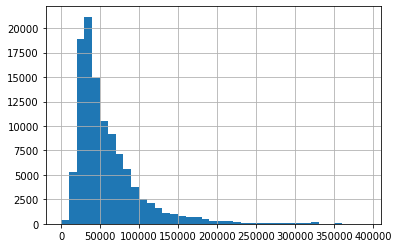

In [14]:
lsp = house_df.land_sale_price
lsp = lsp[lsp != 0]
lsp.hist(bins=np.arange(0,4e5,1e4))

roughly lognormal distributed

<AxesSubplot:>

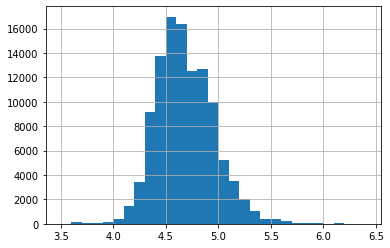

In [15]:
np.log10(lsp).hist(bins=np.arange(3.5,6.5,0.1))

In [16]:
np.round(lsp.describe())

count     110419.0
mean       61520.0
std        76448.0
min          190.0
25%        31000.0
50%        45000.0
75%        72500.0
max      5538500.0
Name: land_sale_price, dtype: float64

### total_sale_price

this is what we are going to predict

<AxesSubplot:>

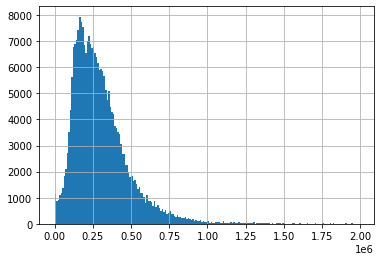

In [17]:
house_df.total_sale_price.hist(bins=np.arange(0,2e6,1e4))

In [18]:
house_df.total_sale_price.value_counts().sort_index()

5.0             1
313.0          16
315.0           1
500.0         124
1000.0         99
             ... 
24125000.0     26
24306400.0     17
25783000.0     22
47925000.0      3
70600000.0     18
Name: total_sale_price, Length: 3653, dtype: int64

In [19]:
tsp = house_df.total_sale_price
print(np.percentile(tsp, range(0,10)))
print(np.percentile(tsp, range(90,101)))

[5.00e+00 2.55e+04 4.90e+04 6.60e+04 7.90e+04 8.85e+04 9.60e+04 1.03e+05
 1.09e+05 1.14e+05]
[  530000.   550000.   570000.   595000.   621500.   651000.   693000.
   749500.   825000.   995000. 70600000.]


In [20]:
print(np.percentile(tsp, np.arange(0,3.1,0.2)))
print(np.percentile(tsp, np.arange(99,100.1,0.1)))

[5.0000e+00 3.0000e+03 8.0000e+03 1.5000e+04 2.0000e+04 2.5500e+04
 3.0806e+04 3.5500e+04 4.0000e+04 4.5000e+04 4.9000e+04 5.3000e+04
 5.6500e+04 6.0000e+04 6.3000e+04 6.6000e+04]
[  995000.          1034000.          1079907.99999998  1129000.
  1200000.          1262442.49999996  1350000.          1500000.
  1787921.7999998   2649424.9999967  70600000.        ]


<AxesSubplot:>

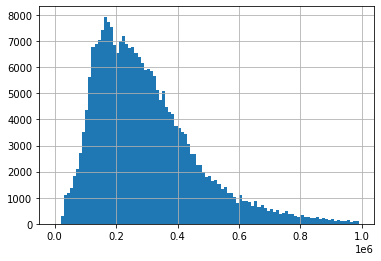

In [21]:
l, r = np.percentile(tsp, [1, 99.5])
tsp = tsp[(tsp > l) & (tsp < r)]
tsp.hist(bins=np.arange(0,1e6,1e4))

In [22]:
# clean 1.5% outliers
house_df = house_df[(house_df["total_sale_price"] > l) &
                    (house_df["total_sale_price"] < r)]
# create log house px
house_df["log_px"] = np.log10(house_df["total_sale_price"])

somewhere between normal and lognormal

<AxesSubplot:>

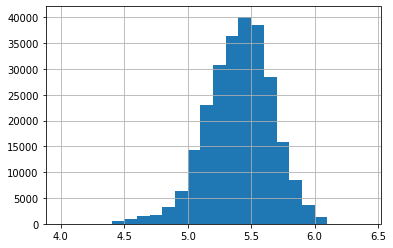

In [23]:
np.log10(tsp).hist(bins=np.arange(4,6.5,0.1))

In [24]:
# note this is after dropping 2% outliers
np.round(tsp.describe())

count     255108.0
mean      300363.0
std       174210.0
min        25800.0
25%       174000.0
50%       265000.0
75%       382500.0
max      1262000.0
Name: total_sale_price, dtype: float64

<AxesSubplot:xlabel='year'>

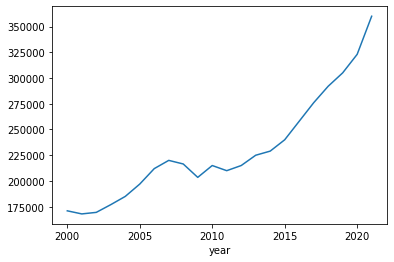

In [25]:
# see trend
house_df.groupby("year")["total_sale_price"].median().plot()

In [26]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all', 'is_covid', 'log_px'],
      dtype='object')

<AxesSubplot:xlabel='year'>

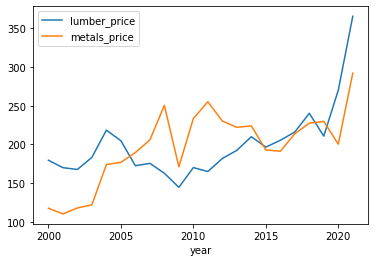

In [27]:
house_df[["lumber_price","metals_price","year"]].drop_duplicates(["year"]).set_index("year").sort_index().plot()

<AxesSubplot:xlabel='year'>

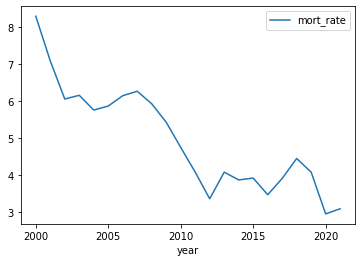

In [28]:
house_df[["mort_rate","year"]].drop_duplicates(["year"]).set_index("year").sort_index().plot()

<AxesSubplot:xlabel='year'>

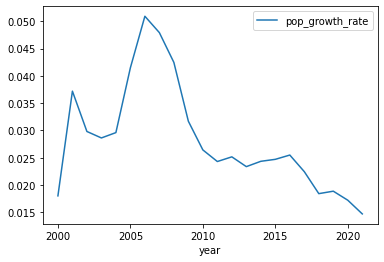

In [29]:
house_df[["pop_growth_rate","year"]].drop_duplicates(["year"]).set_index("year").sort_index().plot()

### deed_date

<AxesSubplot:>

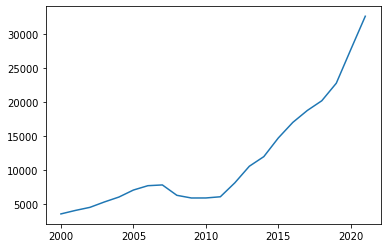

In [30]:
# seeing some trend changes
house_df["year"].value_counts().sort_index().plot()

### assessed_building_value

<AxesSubplot:>

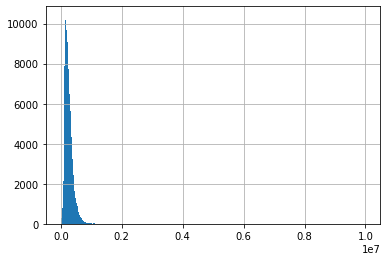

In [31]:
house_df.assessed_building_value.hist(bins=np.arange(0,1e7,1e4))

In [32]:
np.round(house_df.assessed_building_value.describe())

count      255108.0
mean       260276.0
std        157082.0
min             0.0
25%        164511.0
50%        231002.0
75%        322801.0
max      18296504.0
Name: assessed_building_value, dtype: float64

### story_height

In [33]:
house_df.story_height.value_counts()

2.00    123371
1.00     73158
1.50     18593
1.75     17352
1.88     11331
1.63      6238
1.40      3906
3.00      1148
2.50         6
2.40         3
2.63         1
2.75         1
Name: story_height, dtype: int64

The numeric value for story height does not have linear relationship with price

Non-integer story heights of 1.4, 1.5, 1.63, etc. may correspond to multiple levels, hence better price than 2 story.
We need to investigate more the usefulness of this feature.

<AxesSubplot:xlabel='story_height'>

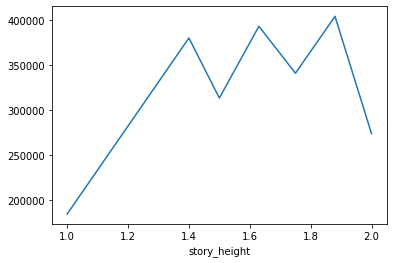

In [34]:
house_df[(house_df["story_height"] <= 2)].groupby("story_height")["total_sale_price"].median().sort_index().plot()

<AxesSubplot:>

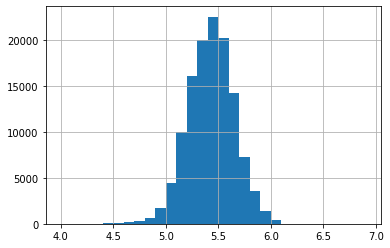

In [35]:
np.log10(house_df[(house_df["story_height"] == 2)]["total_sale_price"]).hist(bins=np.arange(4,7,0.1))

<AxesSubplot:>

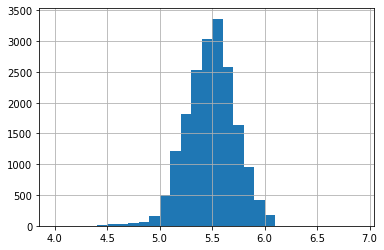

In [36]:
np.log10(house_df[(house_df["story_height"] == 1.5)]["total_sale_price"]).hist(bins=np.arange(4,7,0.1))

<AxesSubplot:>

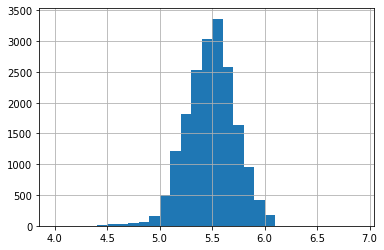

In [37]:
np.log10(house_df[(house_df["story_height"] == 1.5)]["total_sale_price"]).hist(bins=np.arange(4,7,0.1))

story_height
1.50    AxesSubplot(0.125,0.125;0.775x0.755)
1.75    AxesSubplot(0.125,0.125;0.775x0.755)
1.88    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_sale_price, dtype: object

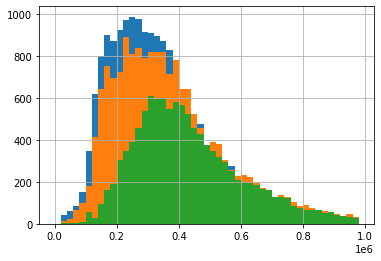

In [38]:
house_df[(house_df["story_height"].isin([1.5,1.75,1.88]))].groupby("story_height")\
    ["total_sale_price"].hist(bins=np.arange(0,1e6,2e4))

story_height
1.4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: total_sale_price, dtype: object

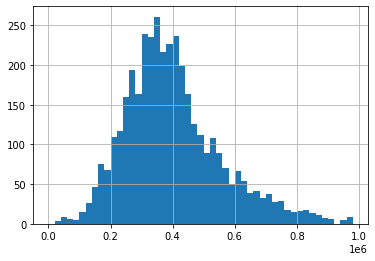

In [39]:
house_df[(house_df["story_height"].isin([1.4]))].groupby("story_height")\
    ["total_sale_price"].hist(bins=np.arange(0,1e6,2e4))

<AxesSubplot:xlabel='story_height'>

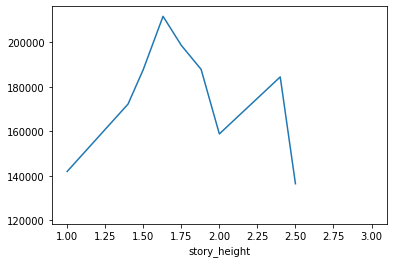

In [40]:
house_df[(house_df["story_height"] <= 3)].groupby("story_height")["total_sale_price"].std().sort_index().plot()

<AxesSubplot:xlabel='story_height'>

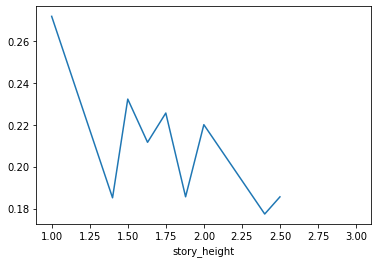

In [41]:
house_df[(house_df["story_height"] <= 3)].groupby("story_height")["log_px"].std().sort_index().plot()

### bath

In [42]:
house_df.bath.value_counts()

2.5    110431
3.5     51216
2.0     45268
3.0     25838
1.5     10724
1.0     10593
0.0       626
4.0       412
Name: bath, dtype: int64

In [43]:
# create two features "bath_unknown" for bath==0, and "bath" for bath >= 0
# "bath_unknown" includes "adequate, no plumbing, limited plumbing, no of fixtures"
print(house_df.bath.value_counts().sort_index())
house_df["bath_unknown"] = 0
house_df.loc[(house_df["bath"] == 0), "bath_unknown"] = 1

0.0       626
1.0     10593
1.5     10724
2.0     45268
2.5    110431
3.0     25838
3.5     51216
4.0       412
Name: bath, dtype: int64


In [44]:
house_df.bath_unknown.value_counts()

0    254482
1       626
Name: bath_unknown, dtype: int64

<AxesSubplot:xlabel='bath'>

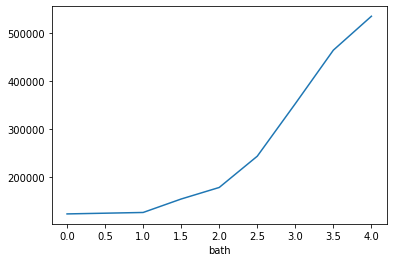

In [45]:
# from the avg price we see "bath_unknown"s' median is somewhere between 1 - 3.5 baths
# so it should not be treated as 0 baths.
house_df.groupby("bath")["total_sale_price"].median().plot()

<AxesSubplot:xlabel='bath'>

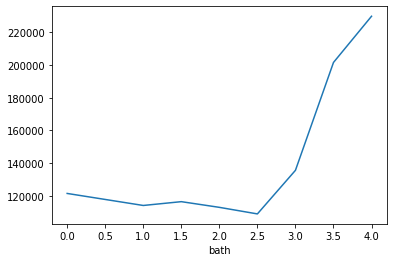

In [46]:
house_df.groupby("bath")["total_sale_price"].std().plot()

<AxesSubplot:xlabel='bath'>

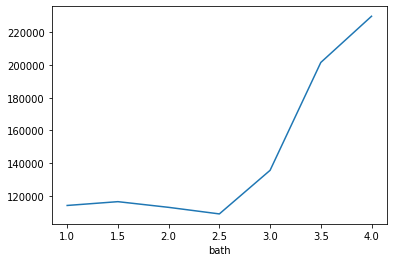

In [47]:
house_df[(house_df["bath"] >= 1)].groupby("bath")["total_sale_price"].std().plot()

In [48]:
house_df['log_px'] = np.log10(house_df["total_sale_price"])

<AxesSubplot:>

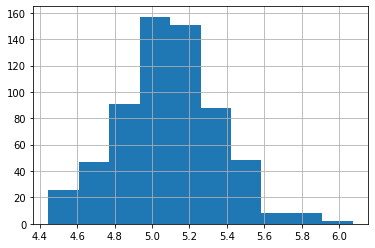

In [49]:
house_df[(house_df['bath'] == 0)]['log_px'].hist()

<AxesSubplot:>

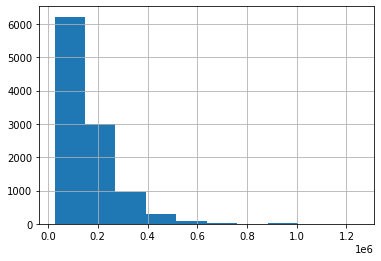

In [50]:
house_df[(house_df["bath"]==1)]["total_sale_price"].hist()#bins=np.arange())

In [51]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all', 'is_covid', 'log_px',
       'bath_unknown'],
      dtype='object')

### physical_zip_code

In [52]:
print(house_df["physical_zip_code"].value_counts())
house_df = house_df[(house_df["physical_zip_code"] != 0)]

27587    18380
27519    15969
27610    15164
27526    13961
27616    13687
27502    13102
27540    12490
27603    11161
27615    10705
27613    10413
27513    10252
27604    10171
27614     8881
27612     8361
27529     7707
27545     7450
27511     7239
27606     7094
27560     6770
27609     6641
27539     6473
27518     4746
27591     4637
27617     4319
27523     4229
27597     3586
27607     3501
27608     2925
27571     2509
27605     1305
27601     1280
Name: physical_zip_code, dtype: int64


In [53]:
# use 27587 as base case
house_df.groupby("physical_zip_code")["log_px"].describe().sort_values("std")

,count,mean,std,min,25%,50%,75%,max
physical_zip_code,,,,,,,,
27571,2509.0,5.475418,0.169018,4.414973,5.381115,5.494155,5.588832,6.068260
27616,13687.0,5.289872,0.180437,4.439333,5.167317,5.298853,5.417886,5.960709
27519,15969.0,5.576290,0.181137,4.447158,5.462398,5.577492,5.703291,6.100715
27560,6770.0,5.441918,0.181471,4.477121,5.315970,5.462398,5.563481,6.096910
27523,4229.0,5.620688,0.196942,4.439333,5.495544,5.628900,5.750508,6.100543
27518,4746.0,5.556608,0.197872,4.414973,5.451786,5.571126,5.681241,6.101059
27502,13102.0,5.485631,0.199550,4.431364,5.361728,5.501059,5.621695,6.097084
27526,13961.0,5.402173,0.200404,4.414973,5.290035,5.427324,5.537819,6.079181
27540,12490.0,5.489878,0.203415,4.414973,5.352183,5.509203,5.633468,6.091667


In [54]:
print(house_df["physical_city"].value_counts())

raleigh          115608
cary              38207
apex              23803
wake forest       18380
fuquay varina     13961
holly springs     12490
garner             7707
knightdale         7450
morrisville        6770
wendell            4637
zebulon            3586
rolesville         2509
Name: physical_city, dtype: int64


## Regression

In [55]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all', 'is_covid', 'log_px',
       'bath_unknown'],
      dtype='object')

In [56]:
import statsmodels.api as sm
yvar = "log_px"

intercept = ["I"]
macro = ["mort_rate", "lumber_price"]

xvars = intercept + macro
reg_df = house_df.copy()
reg_df["I"] = 1
reg_df = reg_df[(reg_df[[yvar]+xvars].notnull().all(axis=1))]

model = sm.OLS(reg_df[yvar], reg_df[xvars]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_px   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:14:16   Log-Likelihood:                -2670.4
No. Observations:              255108   AIC:                             5347.
Df Residuals:                  255105   BIC:                             5378.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
I                5.4139      0.004   1408.563   

In [57]:
10**5.34

218776.16239495517

In [58]:
import statsmodels.api as sm
yvar = "log_px"

reg_df = house_df.copy()

intercept = ["I"]
macro = ["mort_rate", "lumber_price"]
#### story
# base case is story==2, each of below variable represents difference to story==2
story = ["I_story1", "I_story1-2", "I_story_other"]

reg_df["I_story1"] = 0
reg_df.loc[(reg_df["story_height"] == 1), "I_story1"] = 1

reg_df["I_story1-2"] = 0
reg_df.loc[(reg_df["story_height"] > 1) &
           (reg_df["story_height"] < 2), "I_story1-2"] = 1

reg_df["I_story_other"] = 0
reg_df.loc[(reg_df["story_height"] > 2), "I_story_other"] = 1

#### regression
xvars = intercept + macro + story 

reg_df["I"] = 1
reg_df = reg_df[(reg_df[[yvar]+xvars].notnull().all(axis=1))]

model = sm.OLS(reg_df[yvar], reg_df[xvars]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_px   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                 1.550e+04
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:14:16   Log-Likelihood:                 19080.
No. Observations:              255108   AIC:                        -3.815e+04
Df Residuals:                  255102   BIC:                        -3.808e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
I                 5.4182      0.004   1524.400

In [59]:
house_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city', 'street_number',
       'street_name', 'street_type', 'planning_jurisdiction', 'address',
       'mort_rate', 'unemploy_rate', 'pop_growth_rate', 'covid_cases',
       'lumber_price', 'metals_price', 'build_price', 'int_rate', 'supply',
       'demand', 'wake_supply_index', 'wake_demand_index', 'year', 'crime',
       'electric', 'gas', 'water', 'sewer', 'all', 'is_covid', 'log_px',
       'bath_unknown'],
      dtype='object')

In [60]:
10**-0.022

0.9506047936562815

In [80]:
import statsmodels.api as sm
yvar = "log_px"

reg_df = house_df.copy()

intercept = ["I"]
macro = ["mort_rate", "lumber_price"]
#### story
# base case is story==2, each of below variable represents difference to story==2
story = ["I_story1", "I_story1-2", "I_story_other"]

reg_df["is_covid"] = 0
reg_df.loc[reg_df["covid_cases"] > 0, "is_covid"] = 1

reg_df["I_story1"] = 0
reg_df.loc[(reg_df["story_height"] == 1), "I_story1"] = 1

reg_df["I_story1-2"] = 0
reg_df.loc[(reg_df["story_height"] > 1) &
           (reg_df["story_height"] < 2), "I_story1-2"] = 1

reg_df["I_story_other"] = 0
reg_df.loc[(reg_df["story_height"] > 2), "I_story_other"] = 1

#### bath
bath = ["I_bath_unknown", "bath"]
reg_df["I_bath_unknown"] = 0
reg_df.loc[(reg_df["bath"] == 0), "I_bath_unknown"] = 1

#### heated area
reg_df["log_heated_area"] = np.log10(reg_df["heated_area"])
reg_df["log_heated_area0"] = reg_df["log_heated_area"] - reg_df["log_heated_area"].mean()


#### zip
all_zips = reg_df["physical_zip_code"].unique().tolist()
all_zips = [z for z in all_zips if z != 27587]
zip_vars = []
for z in all_zips:
    zip_var = f"I_zip{z}"
    zip_vars.append(zip_var)
    reg_df[zip_var] = 0
    reg_df.loc[(reg_df["physical_zip_code"] == z), zip_var] = 1
    
#### zip interaction with covid
zip_covid = []
for z in zip_vars:
    col = z + "_covid"
    zip_covid.append(col)
    reg_df[col] = reg_df[z] * reg_df["is_covid"]
    
#### bath interaction with covid
reg_df["bath_covid"] = reg_df["bath"] * reg_df["is_covid"]
reg_df["I_story1_covid"] = reg_df["I_story1"] * reg_df["is_covid"]
reg_df["I_story1-2_covid"] = reg_df["I_story1-2"] * reg_df["is_covid"]
reg_df["I_story_other_covid"] = reg_df["I_story_other"] * reg_df["is_covid"]
reg_df["log_heated_area0_covid"] = reg_df["bath"] * reg_df["log_heated_area0"]


#### regression
xvars = intercept + macro + story + bath + ['gas', 'sewer', 'crime', 'log_heated_area0'] +\
    ["bath_covid","log_heated_area0_covid","I_story1_covid","I_story1-2_covid","I_story_other_covid"]+\
    ['is_covid'] + zip_vars + zip_covid

reg_df["I"] = 1
reg_df = reg_df[(reg_df[[yvar]+xvars].notnull().all(axis=1))]

model = sm.OLS(reg_df[yvar], reg_df[xvars]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_px   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     7563.
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:23:12   Log-Likelihood:             1.3688e+05
No. Observations:              255108   AIC:                        -2.736e+05
Df Residuals:                  255030   BIC:                        -2.728e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
I                          5

In [62]:
10** 5.2689

185737.67290529705

<AxesSubplot:>

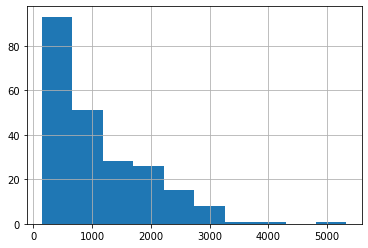

In [63]:
reg_df['lumber_price'].value_counts().hist()

In [64]:
model.params["bath"]

0.046280268596124954

In [65]:
(reg_df[xvars].mean() * model.params[xvars]).sort_values()

mort_rate      -0.097415
bath_covid     -0.017226
sewer          -0.016069
crime          -0.008307
I_zip27610     -0.005676
                  ...   
gas             0.015293
is_covid        0.027277
lumber_price    0.090511
bath            0.118230
I               5.268932
Length: 78, dtype: float64

In [66]:
10**5.26

181970.08586099825

<AxesSubplot:>

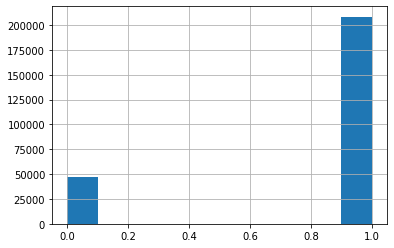

In [67]:
reg_df["sewer"].hist()

<AxesSubplot:>

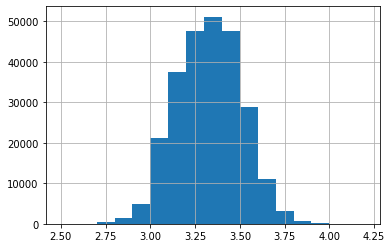

In [68]:

reg_df["log_heated_area"].hist(bins=np.arange(2.5,4.3,0.1))#.hist(bins=np.arange(0,10000,100))

In [69]:
reg_df.columns

Index(['deed_date', 'land_sale_price', 'total_sale_price',
       'assessed_building_value', 'story_height', 'heated_area', 'bath',
       'bath_fixtures', 'physical_zip_code', 'physical_city',
       ...
       'I_zip27519_covid', 'I_zip27518_covid', 'I_zip27617_covid',
       'I_zip27560_covid', 'bath_covid', 'I_story1_covid', 'I_story1-2_covid',
       'I_story_other_covid', 'log_heated_area0_covid', 'I'],
      dtype='object', length=109)

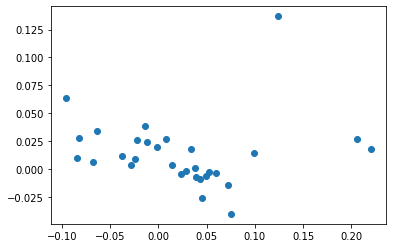

In [70]:
res = model.params[zip_vars].reset_index() # price by zip
res["zip_covid"] = model.params[zip_covid].values # price chg after covide by zip
res["zip"] = all_zips
res = res.drop("index", axis=1)

counts = reg_df.groupby("physical_zip_code").apply(len).reset_index()
counts.columns = ["zip", "cnts"]
res = pd.merge(res, counts, on="zip")
res = res[(res.cnts > 300)]

plt.scatter(res[0], res["zip_covid"])

In [71]:
res.sort_values(0)

,0,zip_covid,zip,cnts
7,-0.095483,0.064156,27610,15164
8,-0.084650,0.009695,27597,3586
14,-0.082659,0.027861,27529,7707
18,-0.067696,0.006592,27545,7450
10,-0.063308,0.034489,27591,4637
21,-0.038209,0.011877,27616,13687
23,-0.028381,0.003817,27571,2509
16,-0.023986,0.009012,27526,13961
0,-0.022625,0.026146,27604,10171
6,-0.013623,0.038557,27511,7239


In [72]:
27601, 27605, 27608

(27601, 27605, 27608)

In [73]:
import statsmodels.api as sm
yvar = "log_px"

reg_df = house_df.copy()

intercept = ["I"]
macro = ["mort_rate", "lumber_price"]
#### story
# base case is story==2, each of below variable represents difference to story==2
story = ["I_story1", "I_story1-2", "I_story_other"]

reg_df["I_story1"] = 0
reg_df.loc[(reg_df["story_height"] == 1), "I_story1"] = 1

reg_df["I_story1-2"] = 0
reg_df.loc[(reg_df["story_height"] > 1) &
           (reg_df["story_height"] < 2), "I_story1-2"] = 1

reg_df["I_story_other"] = 0
reg_df.loc[(reg_df["story_height"] > 2), "I_story_other"] = 1

#### bath
bath = ["I_bath_unknown", "bath"]
reg_df["I_bath_unknown"] = 0
reg_df.loc[(reg_df["bath"] == 0), "I_bath_unknown"] = 1

#### zip
all_zips = reg_df["physical_zip_code"].unique().tolist()
all_zips = [z for z in all_zips if z != 27587]
zip_vars = []
for z in all_zips:
    zip_var = f"I_zip{z}"
    zip_vars.append(zip_var)
    reg_df[zip_var] = 0
    reg_df.loc[(reg_df["physical_zip_code"] == z), zip_var] = 1
    
#### interaction with covid
zip_covid = []
for z in zip_vars:
    col = z + "_covid"
    zip_covid.append(col)
    reg_df[col] = reg_df[z] * reg_df["is_covid"]


#### regression
xvars = intercept + ["is_covid"] + ['heated_area'] + bath + story + macro

reg_df["I"] = 1
reg_df = reg_df[(reg_df[[yvar]+xvars].notnull().all(axis=1))]
reg_df = reg_df[reg_df.year > 2018]

model = sm.OLS(reg_df[yvar], reg_df[xvars]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 log_px   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                 1.109e+04
Date:                Sat, 08 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:14:22   Log-Likelihood:                 39635.
No. Observations:               83071   AIC:                        -7.925e+04
Df Residuals:                   83061   BIC:                        -7.916e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
I                  5.0045      0.010    486.

In [74]:
model.resid.std()

0.1501606959530379

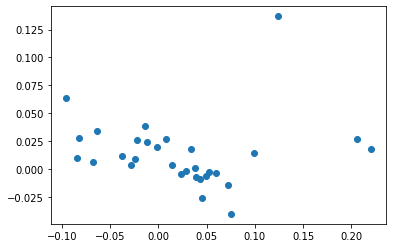

In [78]:
res = model.params[zip_vars].reset_index() # price by zip
res["zip_covid"] = model.params[zip_covid].values # price chg after covide by zip
res["zip"] = all_zips
res = res.drop("index", axis=1)

counts = reg_df.groupby("physical_zip_code").apply(len).reset_index()
counts.columns = ["zip", "cnts"]
res = pd.merge(res, counts, on="zip")
res = res[(res.cnts > 300)]

plt.scatter(res[0], res["zip_covid"])

## Random Forest

In [82]:
# random forest using same data
X, y = reg_df[xvars], reg_df[yvar]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [83]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.08799823315514389
Mean Squared Error: 0.018822888624149225
Root Mean Squared Error: 0.13719653284303224


In [84]:
pd.Series(regressor.feature_importances_, index=xvars).sort_values(ascending=False)

log_heated_area0_covid    0.509627
log_heated_area0          0.172062
lumber_price              0.062552
mort_rate                 0.062319
bath_covid                0.028990
                            ...   
I_zip27518_covid          0.000152
I_zip27560_covid          0.000142
I_zip27617_covid          0.000095
I_zip27571_covid          0.000061
I                         0.000000
Length: 78, dtype: float64

<AxesSubplot:>

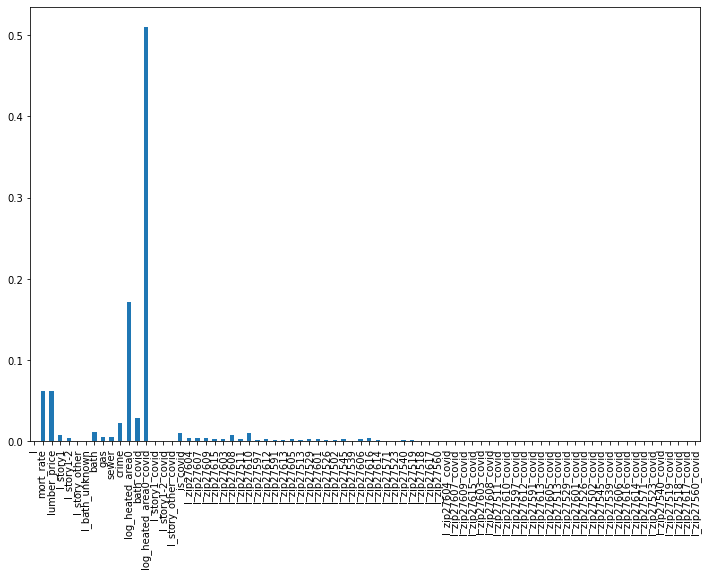

In [89]:
pd.Series(regressor.feature_importances_, index=xvars).plot.bar(figsize=[12,8])